# Models to implement

1.) Decision Tree Classifier

2.) Random Forest Classifier

3.) Light GBM

4.) Logistic Regression

5.) Gradient boosting classifier

6.) Adaboost Classifier

7.) KNN Classifier

8.) MLP

9.) Xgboost

10.) Boost -> Bagg

11.) Support Vector Classification

# Data and libraries import 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PRML_Dataset/PRML Course Project Files/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing

In [ ]:
#droping "id" column
df = df.drop("id",axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Handeling missing values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
#Handeling missing values

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
#Finding non-numerical columns

col = df.select_dtypes(include=['object']).columns.tolist()
col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
#Encoding non-numerical columns
df.gender.unique()
for i in col:
  print("Unique values for", i, "is",df[i].unique())

Unique values for gender is ['Male' 'Female' 'Other']
Unique values for ever_married is ['Yes' 'No']
Unique values for work_type is ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type is ['Urban' 'Rural']
Unique values for smoking_status is ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
for i in range(len(df['gender'])):
  if df['gender'][i] == 'Male':
    df['gender'][i] = 0
  elif (df['gender'][i] == 'Female'):
    df['gender'][i] = 1
  else:
    df['gender'][i] = 2 

In [ ]:
for i in range(len(df['ever_married'])):
  if df['ever_married'][i] == 'Yes':
    df['ever_married'][i] = 0
  else:
    df['ever_married'][i] = 1

In [ ]:
for i in range(len(df['work_type'])):
  if df['work_type'][i] == 'Private':
    df['work_type'][i] = 0
  elif (df['work_type'][i] == 'Self-employed'):
    df['work_type'][i] = 1
  elif (df['work_type'][i] == 'Govt_job'):
    df['work_type'][i] = 2
  elif (df['work_type'][i] == 'children'):
    df['work_type'][i] = 3
  elif (df['work_type'][i] == 'Never_worked'):
    df['work_type'][i] = 4    

In [ ]:
for i in range(len(df['Residence_type'])):
  if df['Residence_type'][i] == 'Urban':
    df['Residence_type'][i] = 0
  else:
    df['Residence_type'][i] = 1

In [ ]:
for i in range(len(df['smoking_status'])):
  if df['smoking_status'][i] == 'formerly smoked':
    df['smoking_status'][i] = 0
  elif (df['smoking_status'][i] == 'never smoked'):
    df['smoking_status'][i] = 1
  elif (df['smoking_status'][i] == 'smokes'):
    df['smoking_status'][i] = 2
  else:
    df['smoking_status'][i] = 3         

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,1,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,1,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
#Defining y as target and x as features
x = df.iloc[:,0:10]
y = df.iloc[:,10]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
# As different features has different scaling or range, we need to do scaling for better accuracy, hence scaled testing as well as training dataset using standard scalar

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
X_train = x_train
Y_train = y_train
X_test = x_test
Y_test = y_test

In [ ]:
np.unique(df['stroke'], return_counts=True)

(array([0, 1]), array([4861,  249]))

# Visualisation

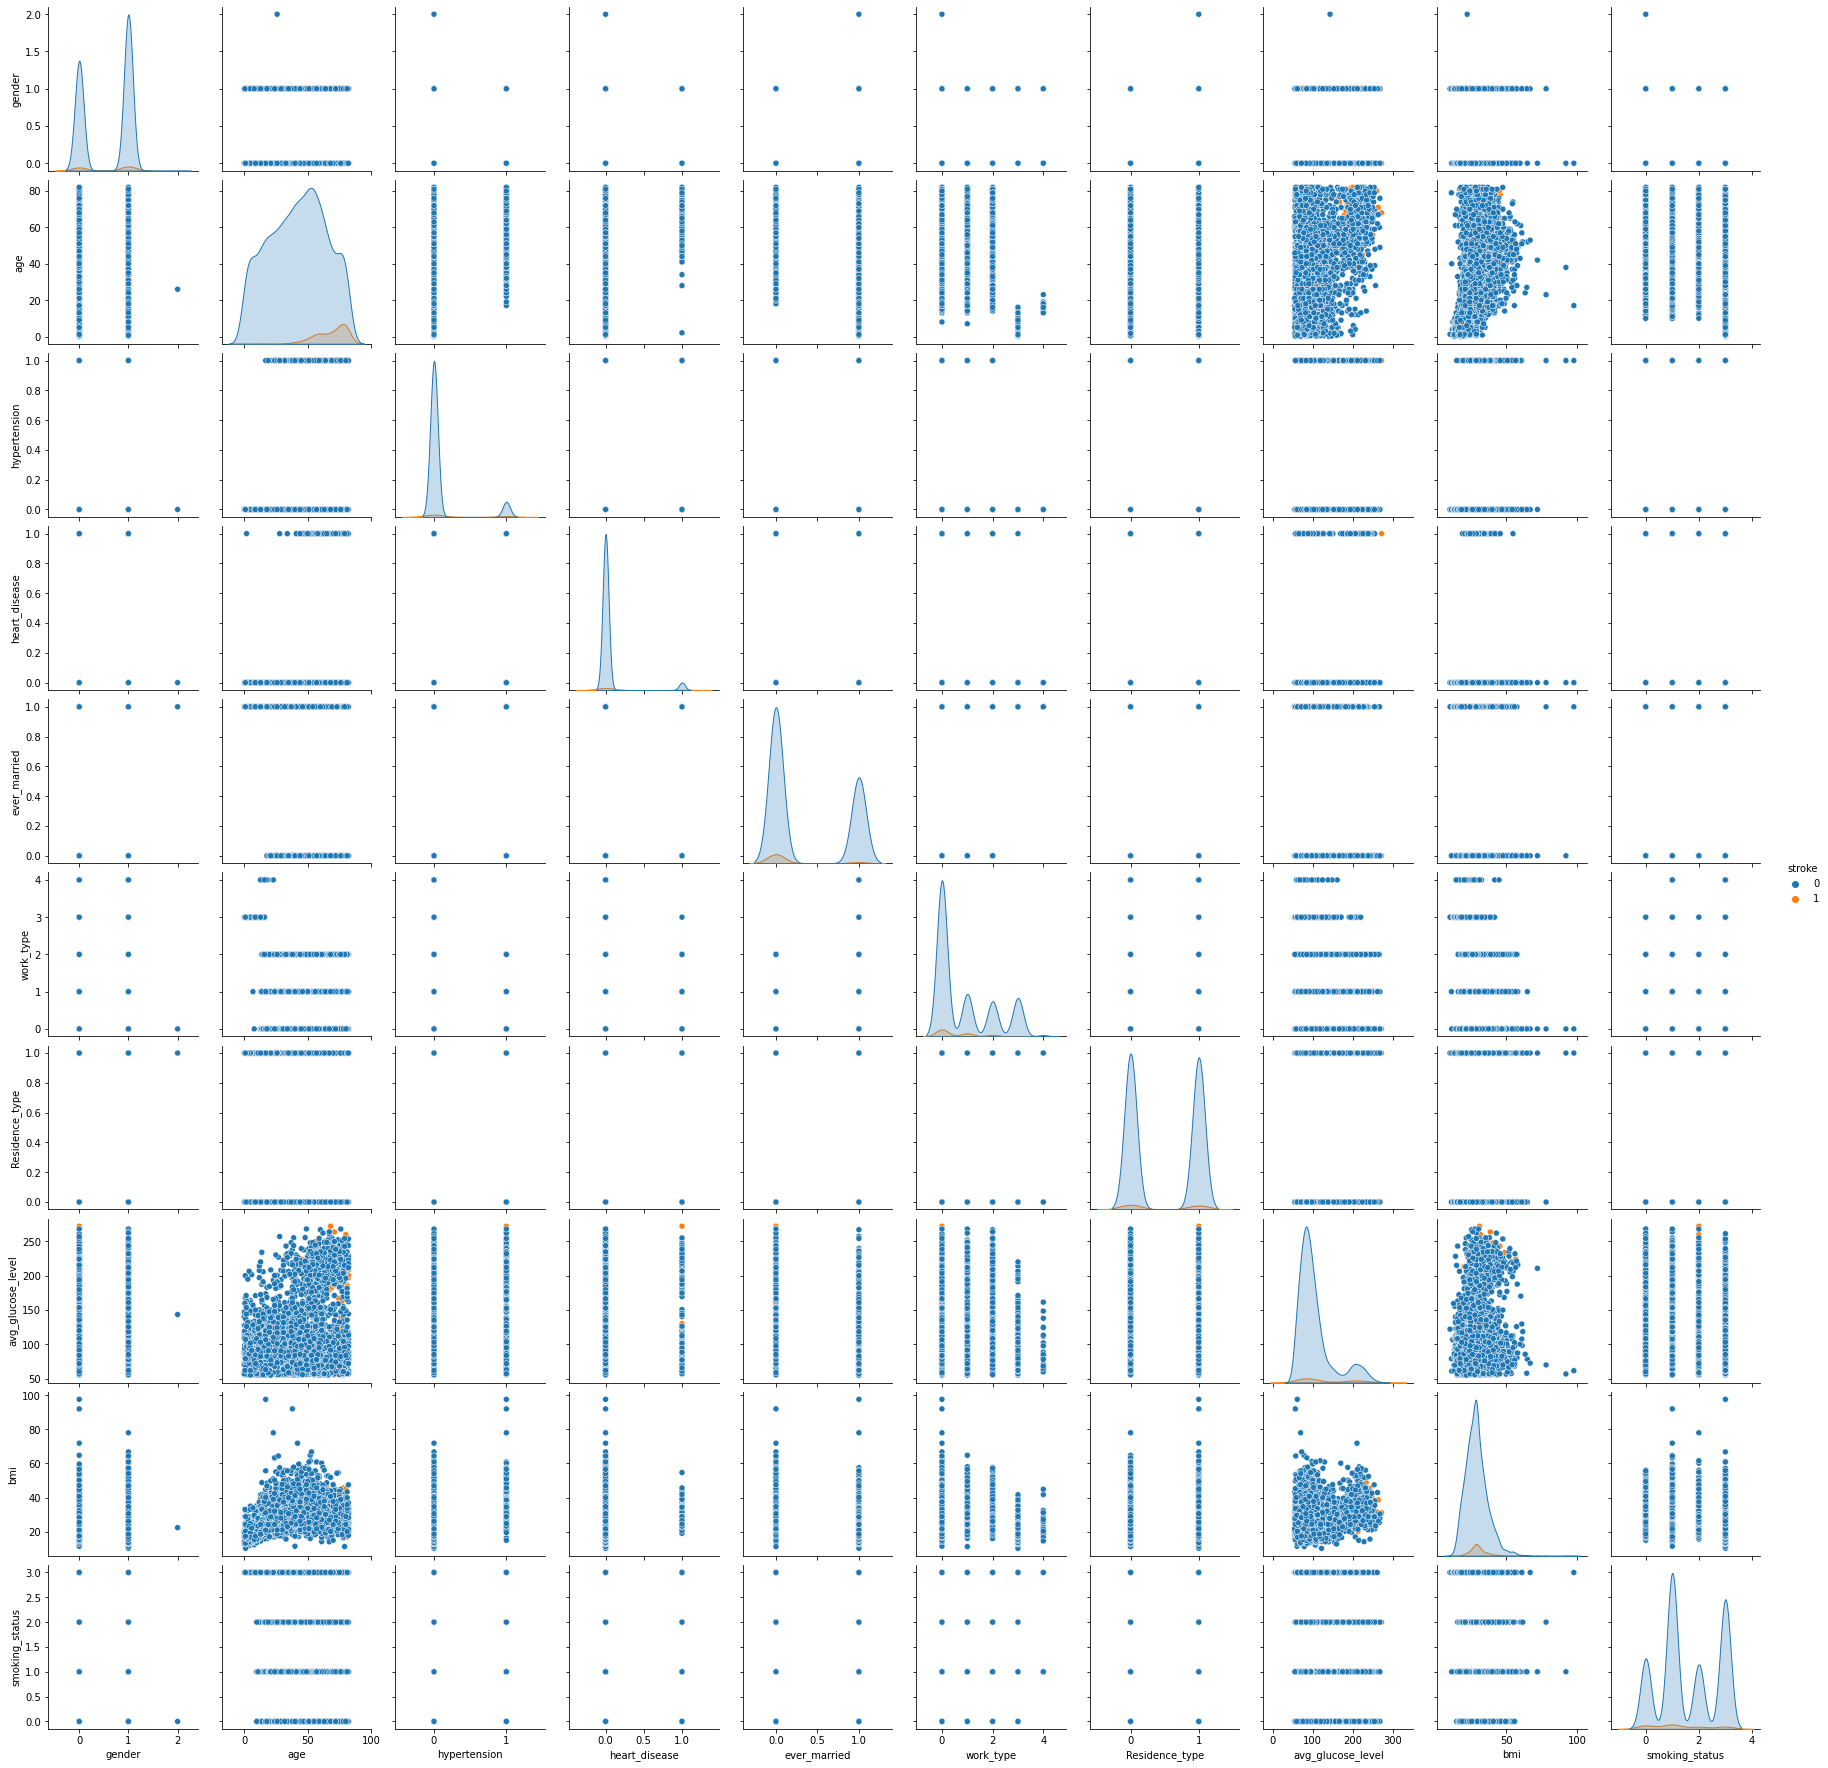

In [ ]:
sns.pairplot(df, hue='stroke')

0    4861
1     249
Name: stroke, dtype: int64


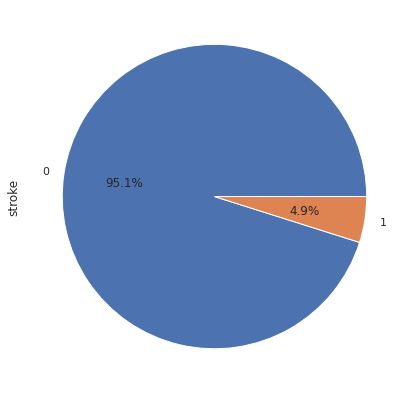

In [ ]:
print(df["stroke"].value_counts())
df["stroke"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7));

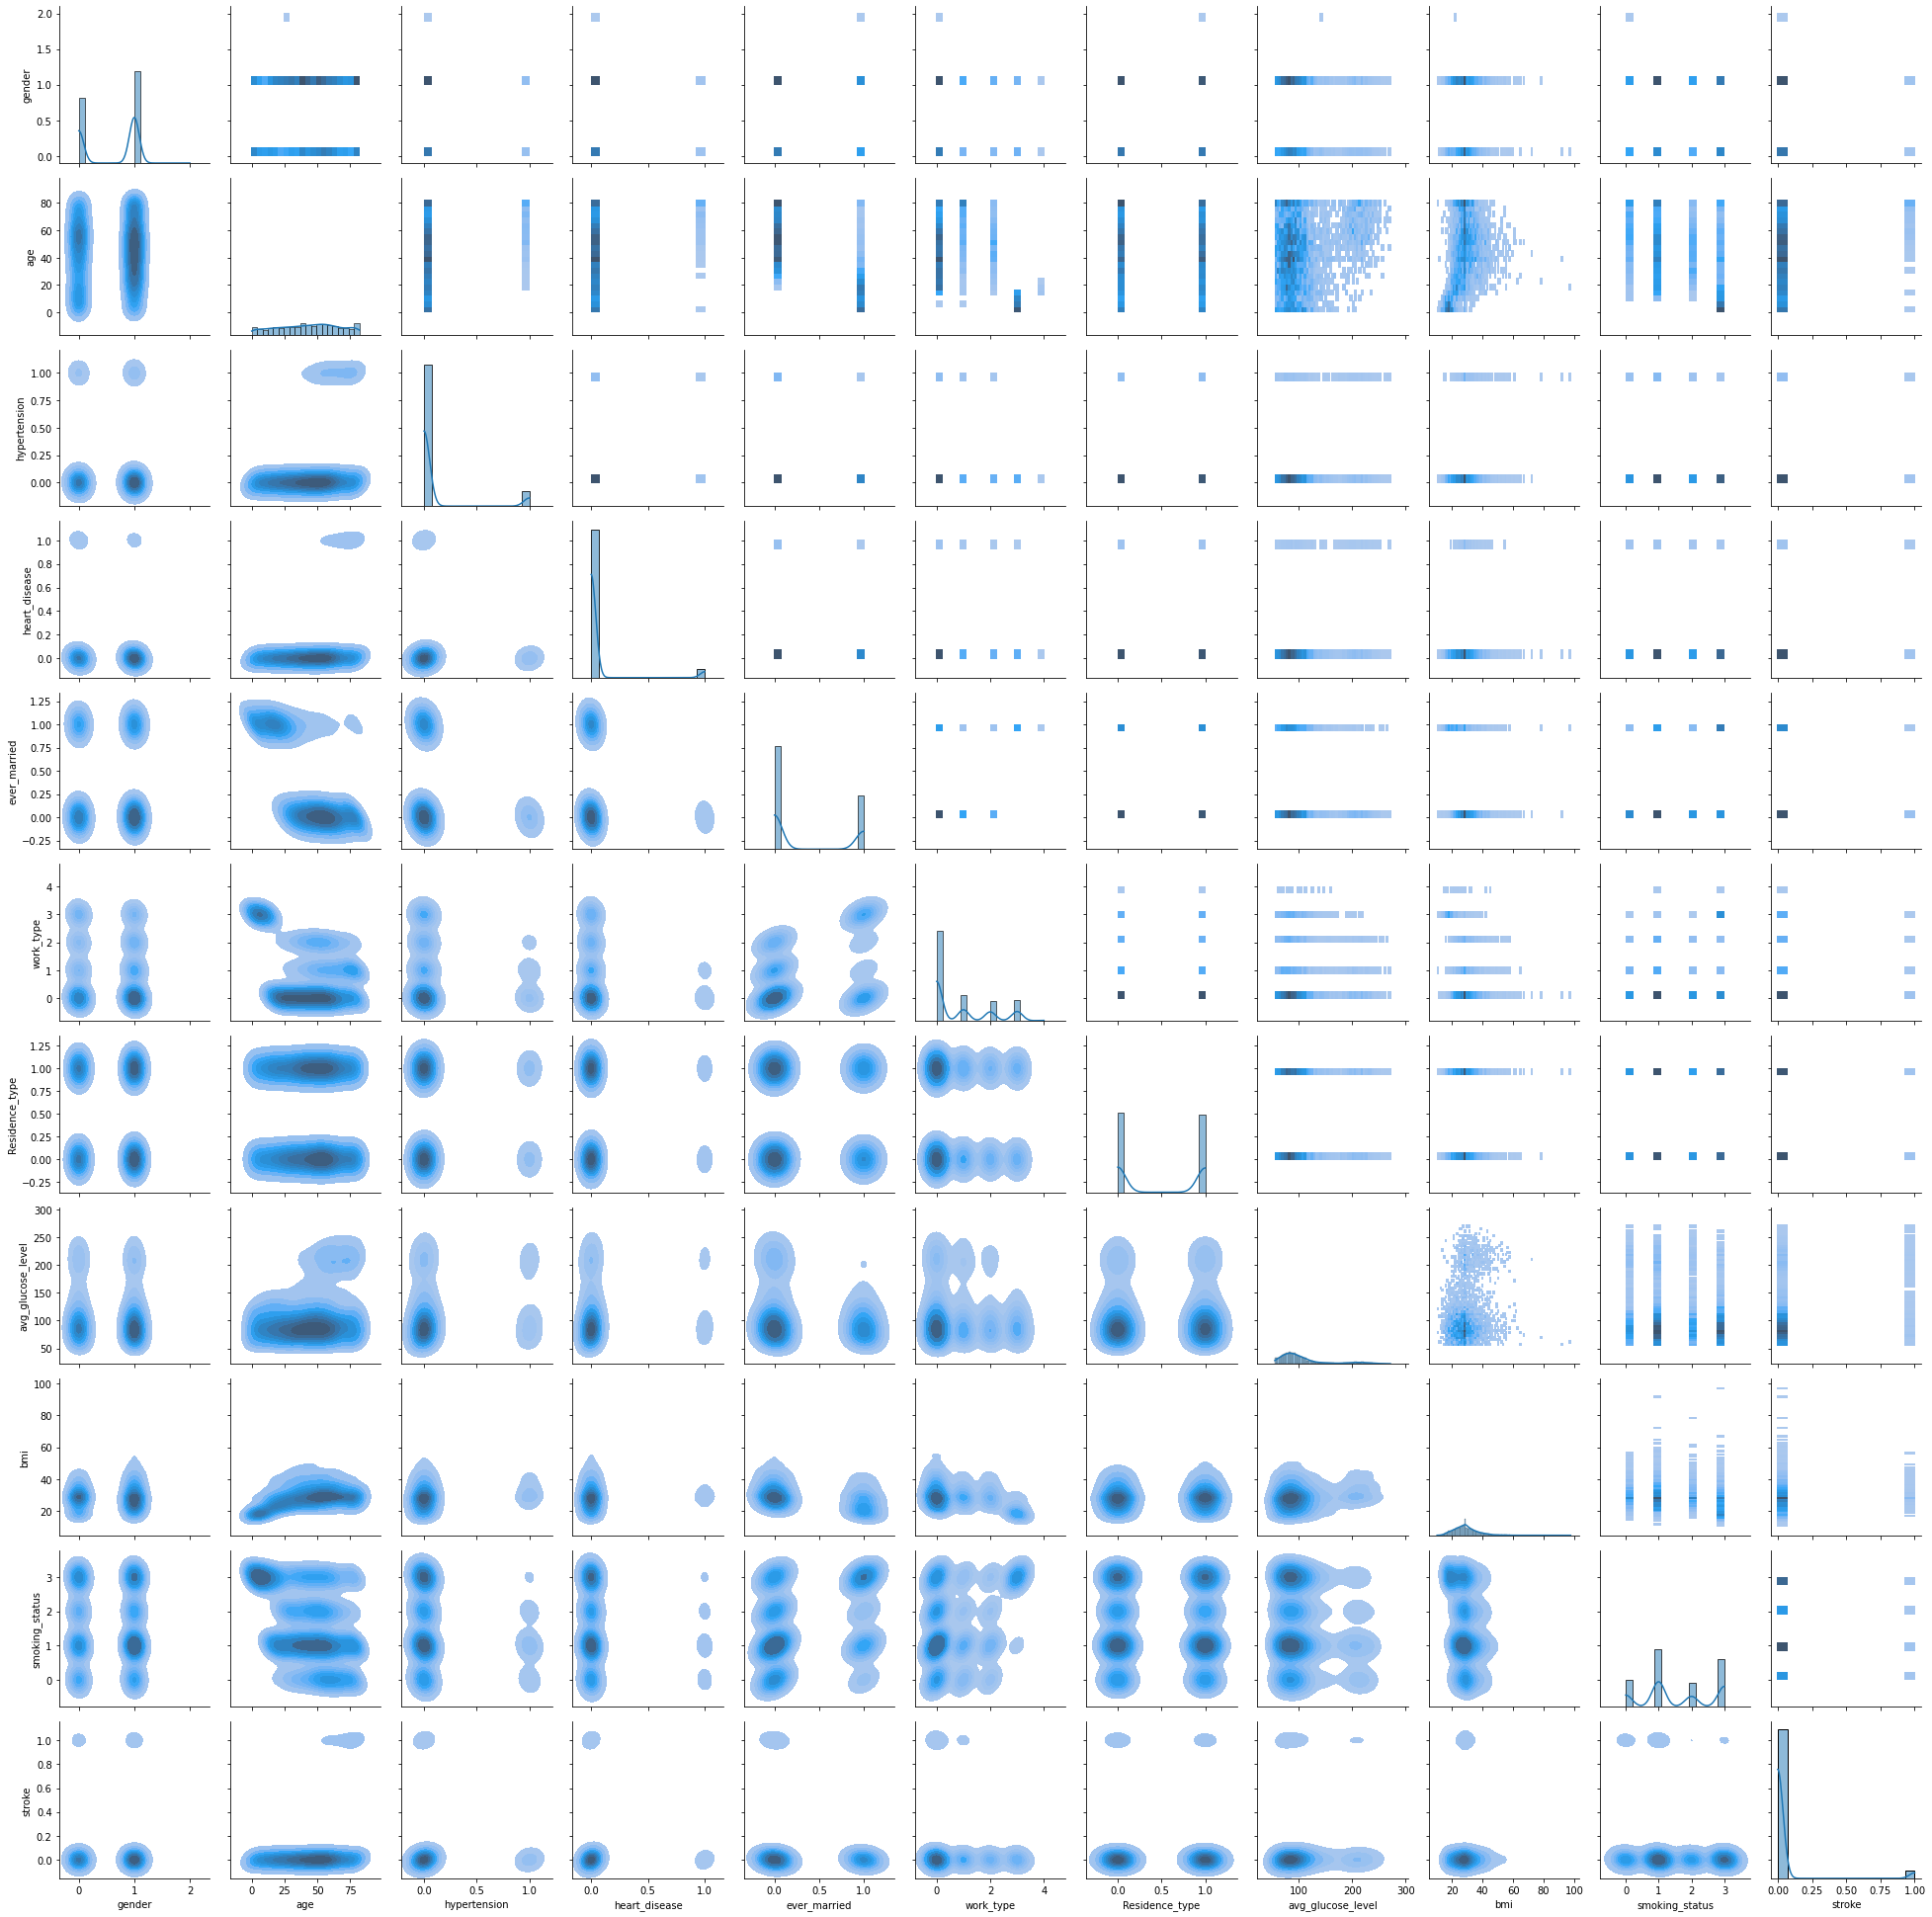

In [ ]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

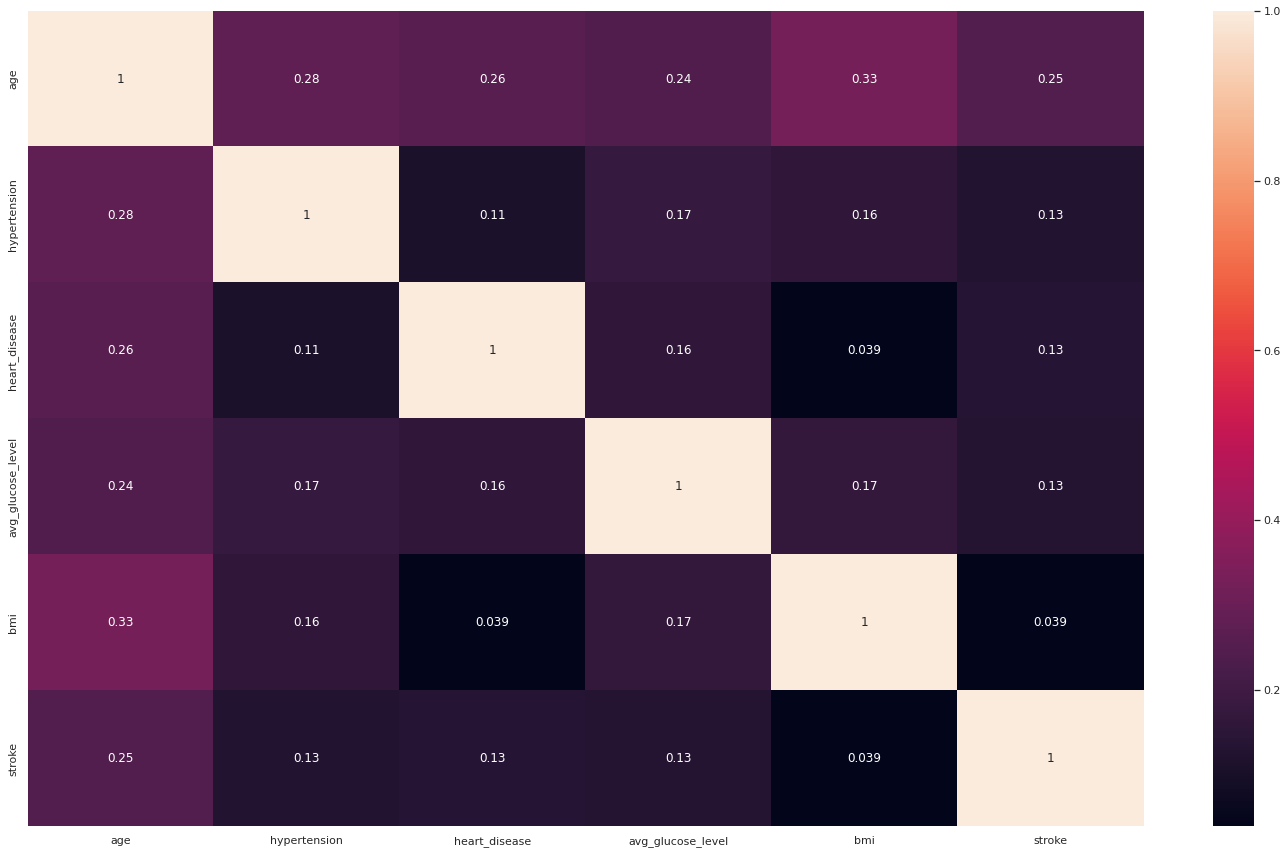

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(df.corr(), annot=True)

gender = 1 is male and gender = 0 is female


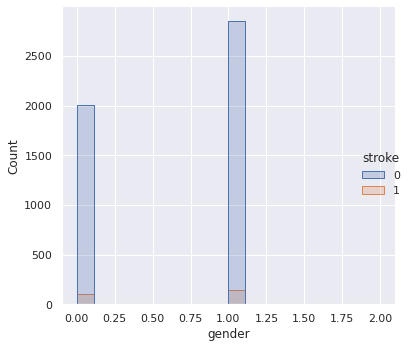

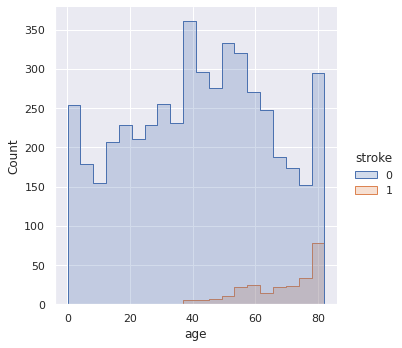

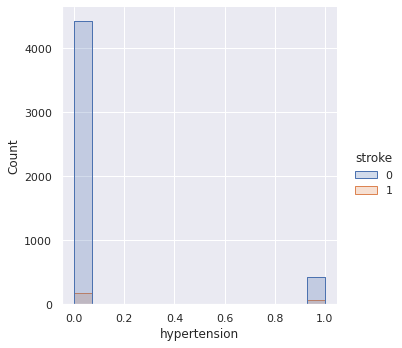

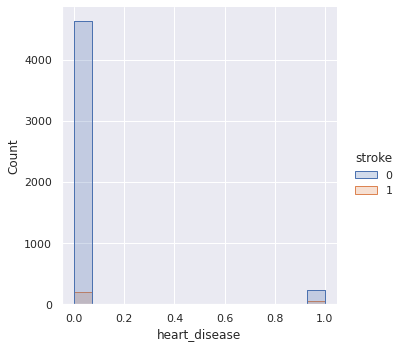

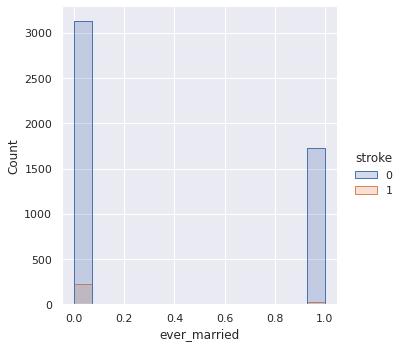

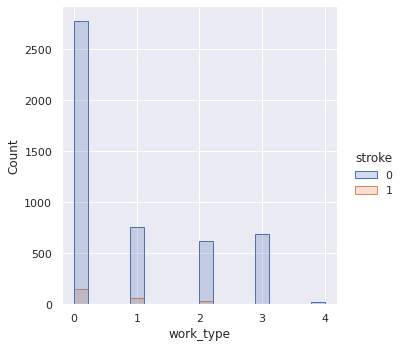

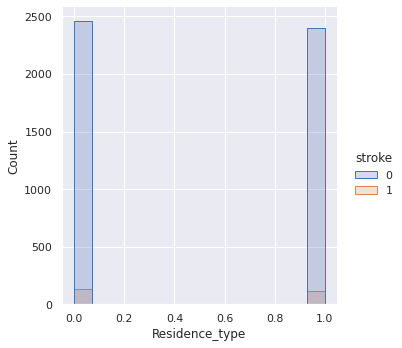

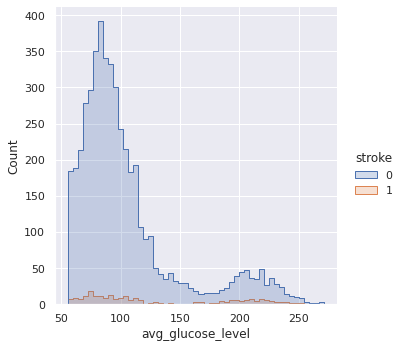

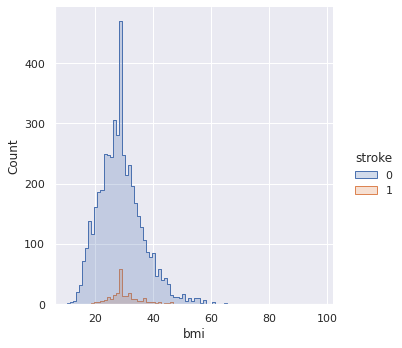

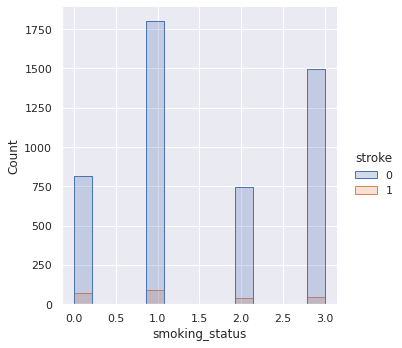

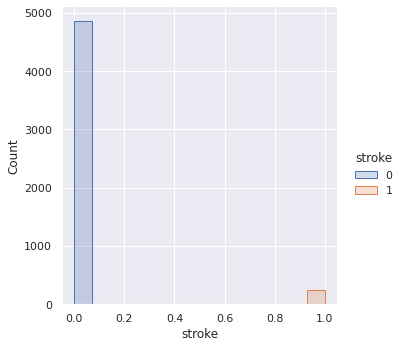

In [ ]:
sns.displot(df, x="gender", hue="stroke", element="step").add_legend()
print("gender = 1 is male and gender = 0 is female")
sns.displot(df, x="age", hue="stroke", element="step")
sns.displot(df, x="hypertension", hue="stroke", element="step")
sns.displot(df, x="heart_disease", hue="stroke", element="step")
sns.displot(df, x="ever_married", hue="stroke", element="step")
sns.displot(df, x="work_type", hue="stroke", element="step")
sns.displot(df, x="Residence_type", hue="stroke", element="step")
sns.displot(df, x="avg_glucose_level", hue="stroke", element="step")
sns.displot(df, x="bmi", hue="stroke", element="step")
sns.displot(df, x="smoking_status", hue="stroke", element="step")
sns.displot(df, x="stroke", hue="stroke", element="step")

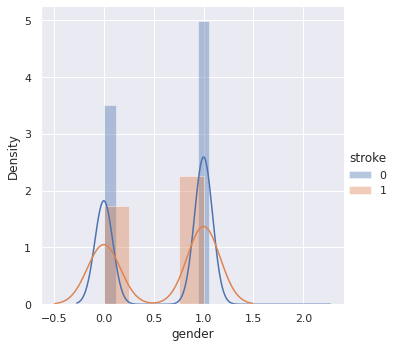

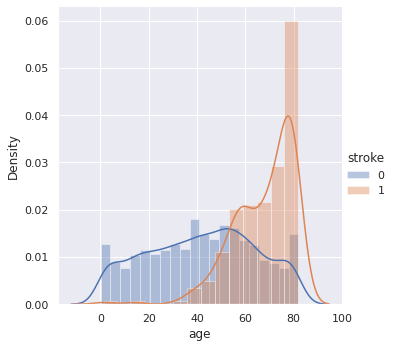

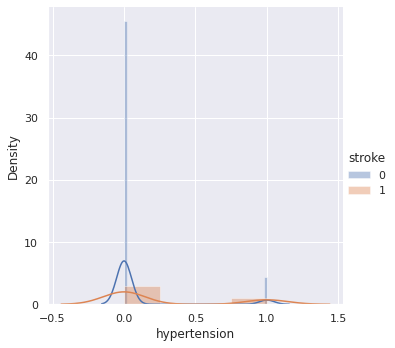

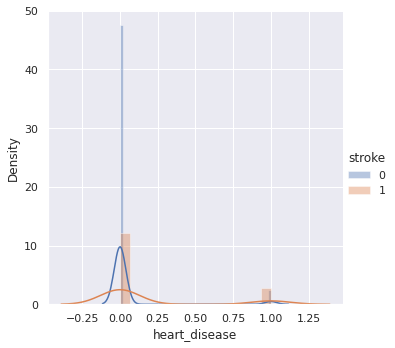

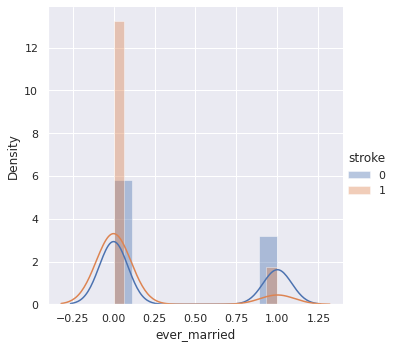

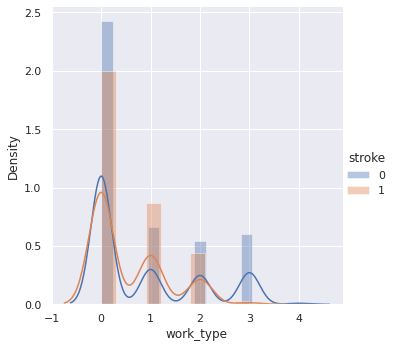

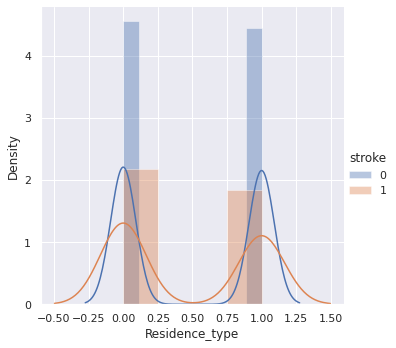

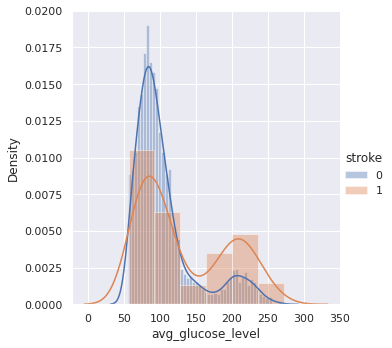

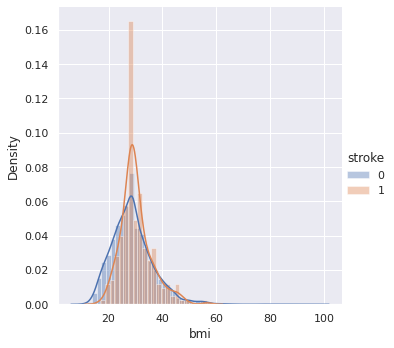

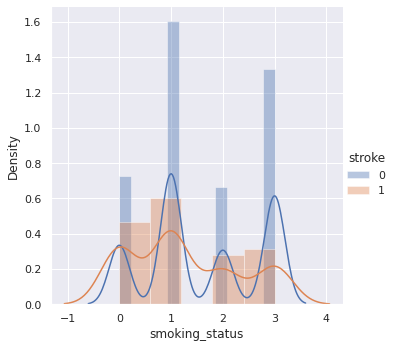

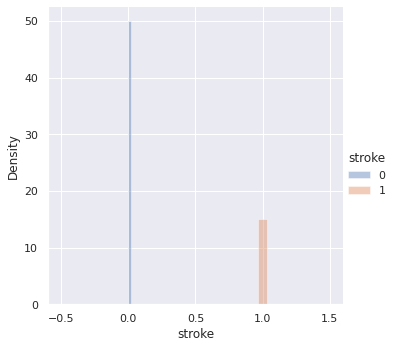

In [ ]:
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'gender').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'age').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'hypertension').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'heart_disease').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'ever_married').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'work_type').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'Residence_type').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'avg_glucose_level').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'bmi').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'smoking_status').add_legend()
sns.FacetGrid(df, hue='stroke', size=5).map(sns.distplot,'stroke').add_legend()

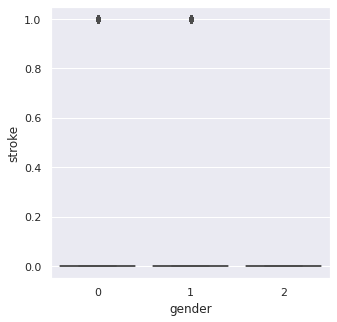

In [ ]:
# for col in df.columns:
#   sns.boxplot(x=col, y='stroke', data=df)
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='gender',y='stroke',data=df)

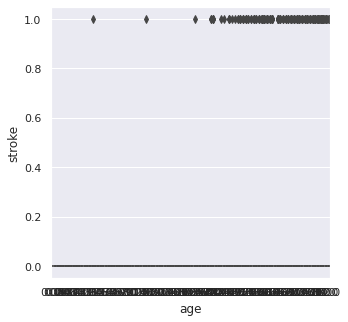

In [ ]:
sns.boxplot(x='age',y='stroke',data=df)


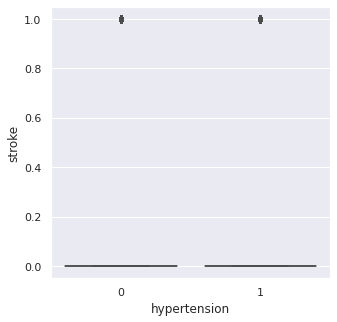

In [ ]:
sns.boxplot(x='hypertension',y='stroke',data=df)


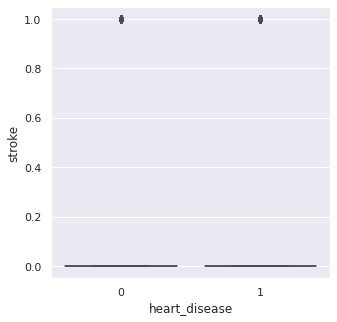

In [ ]:
sns.boxplot(x='heart_disease',y='stroke',data=df)


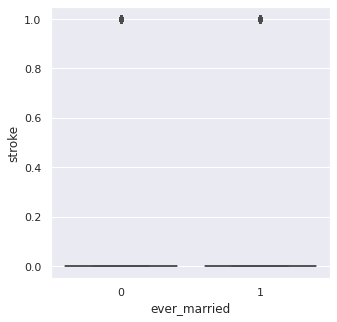

In [ ]:
sns.boxplot(x='ever_married',y='stroke',data=df)


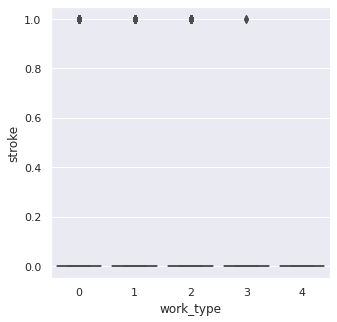

In [ ]:
sns.boxplot(x='work_type',y='stroke',data=df)


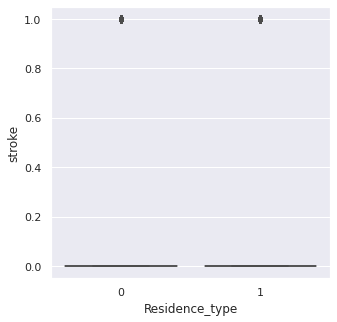

In [ ]:
sns.boxplot(x='Residence_type',y='stroke',data=df)


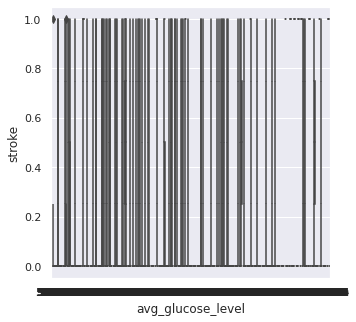

In [ ]:
sns.boxplot(x='avg_glucose_level',y='stroke',data=df)


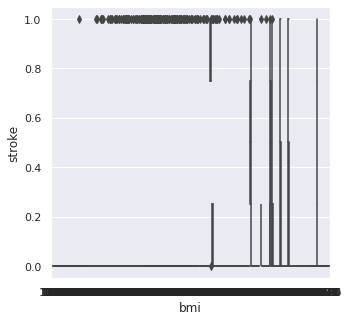

In [ ]:
sns.boxplot(x='bmi',y='stroke',data=df)


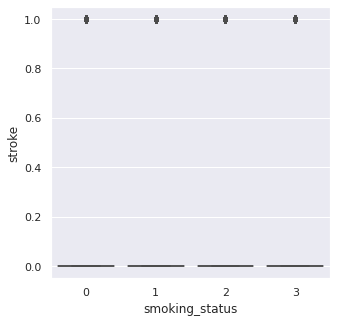

In [ ]:
sns.boxplot(x='smoking_status',y='stroke',data=df)


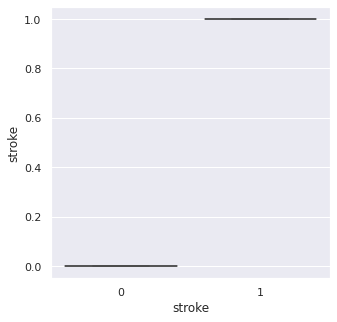

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='stroke',y='stroke',data=df)

# Pipeline

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import lightgbm as gbm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

import plotly.express as px
svc=SVC(probability=True, kernel='linear')
xgbr =  XGBClassifier(n_estimators= 300, max_depth= 5, learning_rate= 0.15)

In [ ]:
lr_pipeline = Pipeline([('Logistic Regression', LogisticRegression())])
knn_pipeline = Pipeline([('K Neighbors Classifier', KNeighborsClassifier(n_neighbors = 14))])
abc_pipeline = Pipeline([('Ada Boost Classifier', AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1))])
gbc_pipeline = Pipeline([('Gradient Boosting Classifier', GradientBoostingClassifier())])
xgb_pipeline = Pipeline([('XGBoost Classifier', XGBClassifier())])
booba_pipeline = Pipeline([('Boost->Bagging Method',  BaggingClassifier(base_estimator=xgbr, random_state=0))])
svc_pipeline = Pipeline([('Support Vector Classification', SVC(probability= True))])
svc_pipeline1 = Pipeline([('Support Vector Classification', SVC(probability= True, C=1, decision_function_shape= 'ovo', degree= 2, gamma= 'scale'))])
dtc_pipeline = Pipeline([('Decision Tree Classifier', DecisionTreeClassifier())])
rfc_pipeline = Pipeline([('Random Forest Classifier', RandomForestClassifier(max_depth=2, random_state=0))])
lgbm_pipeline = Pipeline([('Light gbm', gbm.LGBMClassifier(learning_rate=0.25,n_estimators=800,max_depth=10,cv=5))])

In [ ]:
def access_pipeline(pipeline, x_train, y_train, x_test,y_test):
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    print("\nAccuracy from the model for testing data is", accuracy_score(y_test, y_pred)*100, "%.\n")
    print("Confusion Matrix for the model is :\n")
    plot_confusion_matrix(pipeline, x_test, y_test)
    plt.show()
    print("\nClassification report :\n")
    print(classification_report(y_test, y_pred))
    print("\nROC and AUC :\n")
    y_predicted = pipeline.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
    roc_fig = px.area(x=fpr, y=tpr,title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',labels=dict(x='False Positive Rate', y='True Positive Rate'),width=800, height=500,template='plotly_dark')
    roc_fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1)
    roc_fig.update_yaxes(scaleanchor="x", scaleratio=1)
    roc_fig.update_xaxes(constrain='domain')
    
    roc_fig.show()

#Decision Tree Classifier


Accuracy from the model for testing data is 91.19373776908023 %.

Confusion Matrix for the model is :



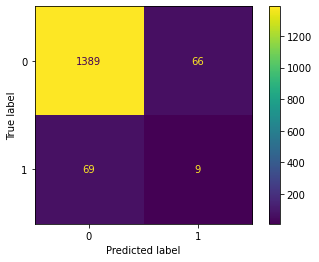


Classification report :

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1455
           1       0.12      0.12      0.12        78

    accuracy                           0.91      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.91      0.91      0.91      1533


ROC and AUC :



In [ ]:
access_pipeline(dtc_pipeline, x_train, y_train, x_test,y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [2, 4, 6, 8, 12], 
    'min_samples_leaf' : [5, 10, 20, 50, 100]
}

clf_dtr = GridSearchCV(estimator= DecisionTreeClassifier(),                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10) 

In [ ]:
clf_dtr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 12],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf_dtr.best_params_)

Tuned Hyperparameters : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}


In [ ]:
dtc_pipeline1 = Pipeline([('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 5))])


Accuracy from the model for testing data is 94.9119373776908 %.

Confusion Matrix for the model is :



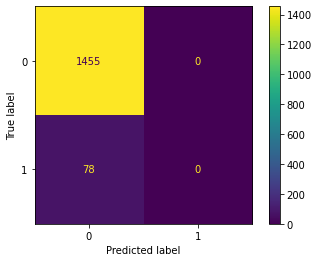


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1455
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(dtc_pipeline1, x_train, y_train, x_test,y_test)

#Random Forest Classifier


Accuracy from the model for testing data is 94.78147423352902 %.

Confusion Matrix for the model is :



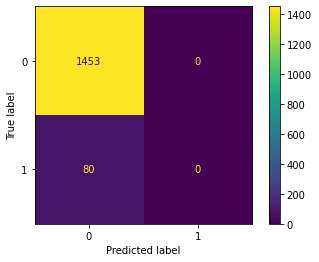


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(rfc_pipeline, x_train, y_train, x_test,y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'bootstrap': [True],
    'max_depth': [70, 80, 100],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}

clf_rfc = GridSearchCV(estimator= RandomForestClassifier(),                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10) 

In [ ]:
clf_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf_rfc.best_params_)

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [ ]:
rfc_pipeline1 = Pipeline([('Random Forest Classifier', RandomForestClassifier( bootstrap = True,  max_depth = 80,  max_features = 2,  min_samples_leaf = 3,  min_samples_split = 8,  n_estimators = 200))])


Accuracy from the model for testing data is 94.9119373776908 %.

Confusion Matrix for the model is :



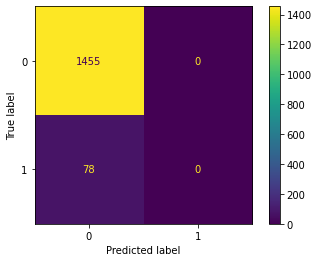


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1455
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(rfc_pipeline1, x_train, y_train, x_test,y_test)

# Lightgbm


Accuracy from the model for testing data is 93.41161121983039 %.

Confusion Matrix for the model is :



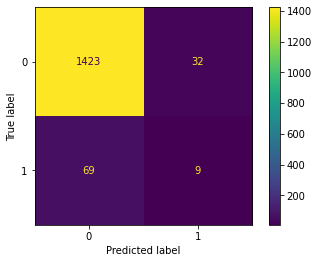


Classification report :

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1455
           1       0.22      0.12      0.15        78

    accuracy                           0.93      1533
   macro avg       0.59      0.55      0.56      1533
weighted avg       0.92      0.93      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(lgbm_pipeline, x_train, y_train, x_test,y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf_lgbm = GridSearchCV(estimator= gbm.LGBMClassifier(),                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10) 

In [ ]:
clf_lgbm.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf_lgbm.best_params_)

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
lgbm_pipeline1 = Pipeline([('Light gbm', gbm.LGBMClassifier( bootstrap = True,  max_depth = 80,  max_features = 2,  min_samples_leaf = 3,  min_samples_split = 8,  n_estimators = 100))])


Accuracy from the model for testing data is 94.3900848010437 %.

Confusion Matrix for the model is :



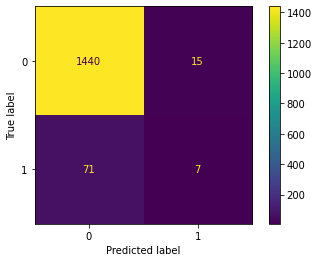


Classification report :

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1455
           1       0.32      0.09      0.14        78

    accuracy                           0.94      1533
   macro avg       0.64      0.54      0.56      1533
weighted avg       0.92      0.94      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(lgbm_pipeline1, x_train, y_train, x_test,y_test)

# Logistic Regression


Accuracy from the model for testing data is 94.9119373776908 %.

Confusion Matrix for the model is :



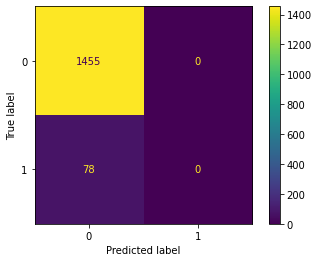


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1455
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(lr_pipeline, x_train, y_train, x_test, y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.linspace(-3,3,100),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

clf = GridSearchCV(lr_pipeline,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.6060606...
        1.54545455,  1.60606061,  1.66666667,  1.72727273,  1.78787879,
        1.84848485,  1.90909091,  1.96969697,  2.03030303,  2.09090909,
        2.15151515,  2.21212121,  2.27272727,  2.33333333,  2.39393939,
        2.45454545,  2.51515152,  2.57575758,  2.63636364,  2.6969697 ,
        2.75757576,  2.81818182,  2.87878788,  2.93939394,  3.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 0.030303030303030276, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_pipeline1 = Pipeline([('Logistic Regression', LogisticRegression(C= 0.030303030303030276, penalty= 'l1', solver= 'liblinear'))])


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



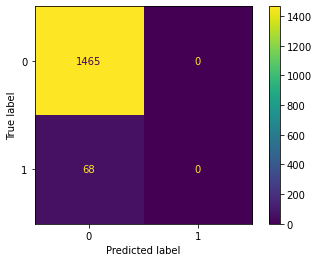


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(lr_pipeline1, x_train, y_train, x_test, y_test)

# K Nearest Neighbours


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



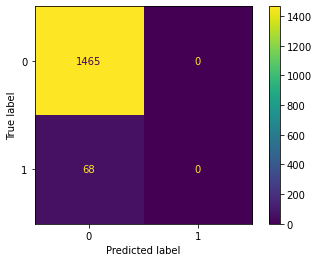


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(knn_pipeline, x_train, y_train, x_test, y_test)

In [ ]:
neighbours = range(1,30)
test_acc = []
train_acc = []
op_ngh = 0
max_acc = 0
for i in neighbours:
  knn_pipeline = KNeighborsClassifier(n_neighbors = i)
  knn_pipeline.fit(x_train, y_train)
  acc_trn = knn_pipeline.score(x_train, y_train)
  acc_tst = knn_pipeline.score(x_test, y_test)
  train_acc.append(acc_trn)
  test_acc.append(acc_tst)
  if(acc_tst > max_acc):
    max_acc = acc_tst
    op_ngh = i

print("Optimal n_neighbors for knn is", op_ngh,"and it gives", max_acc,"of testing accuracy") 

Optimal n_neighbors for knn is 8 and it gives 0.9556425309849967 of testing accuracy


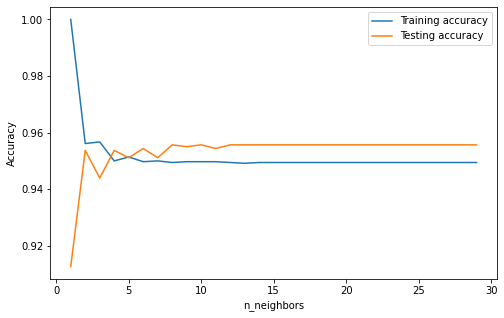

In [ ]:
fig = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 30), train_acc, label = 'Training accuracy')
plt.plot(range(1, 30), test_acc, label = 'Testing accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
leaf_sizes = range(1,30)
test_acc1 = []
train_acc1 = []
op_leaf_size = 0
max_acc1 = 0
for i in leaf_sizes:
  knn_pipeline = KNeighborsClassifier(n_neighbors = op_ngh, leaf_size = i)
  knn_pipeline.fit(x_train, y_train)
  acc_trn = knn_pipeline.score(x_train, y_train)
  acc_tst = knn_pipeline.score(x_test, y_test)
  train_acc1.append(acc_trn)
  test_acc1.append(acc_tst)
  if(acc_tst > max_acc1):
    max_acc1 = acc_tst
    op_leaf_size = i

print("Optimal leaf_sizes for knn is", op_leaf_size,"and it gives", max_acc1,"of testing accuracy.")

Optimal leaf_sizes for knn is 1 and it gives 0.9523809523809523 of testing accuracy.


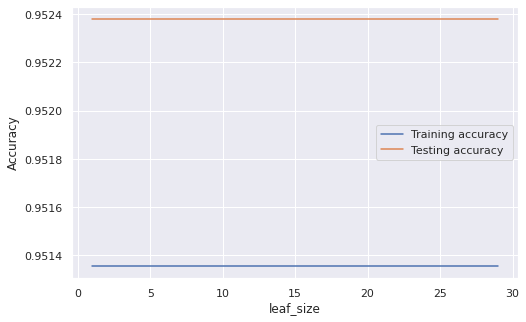

In [ ]:
fig = plt.subplots(figsize=(8, 5))
plt.plot(range(1, 30), train_acc1, label = 'Training accuracy')
plt.plot(range(1, 30), test_acc1, label = 'Testing accuracy')
plt.legend()
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_pipeline2 = Pipeline([('K Neighbors Classifier', KNeighborsClassifier(n_neighbors = op_ngh))]) 


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



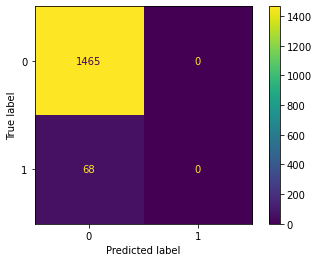


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(knn_pipeline2, x_train, y_train, x_test, y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'leaf_size' :  list(range(1,50)),
 'n_neighbors' :  list(range(1,30)),
 'p': [1,2]
}

clf = GridSearchCV(knn_pipeline,param_grid = parameters,cv=10)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'leaf_size': 1, 'n_neighbors': 8, 'p': 1}


In [ ]:
knn_pipeline3 = Pipeline([('K Neighbors Classifier', KNeighborsClassifier(leaf_size = 1, n_neighbors = 12, p = 2))])


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



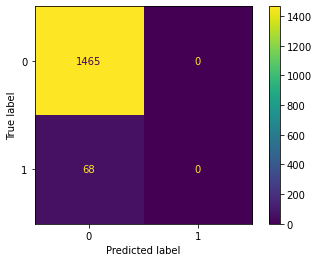


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(knn_pipeline3, x_train, y_train, x_test, y_test)

# Gradient Boosting Classifier


Accuracy from the model for testing data is 95.04240052185257 %.

Confusion Matrix for the model is :



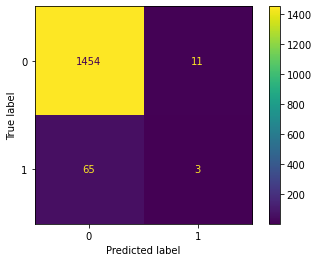


Classification report :

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1465
           1       0.21      0.04      0.07        68

    accuracy                           0.95      1533
   macro avg       0.59      0.52      0.52      1533
weighted avg       0.92      0.95      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(gbc_pipeline, x_train, y_train, x_test,y_test)

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {
 'n_estimators' : range(2,25), 'learning_rate' : [0.3, 0.5, 0.8, 1.5], 'max_features' : [2, 3, 5, 4], 'max_depth' : [2, 5, 8, 13]
}


clf = GridSearchCV(gbc_pipeline,param_grid = parameters,cv=10)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.8, 1.5],
                         'max_depth': [2, 5, 8, 13],
                         'max_features': [2, 3, 5, 4],
                         'n_estimators': range(2, 25)})

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 2, 'n_estimators': 2}


In [ ]:
gbc_pipeline1 = Pipeline([('Gradient Boosting Classifier', GradientBoostingClassifier(learning_rate = 0.5, max_depth = 2, max_features = 2, n_estimators = 4))])


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



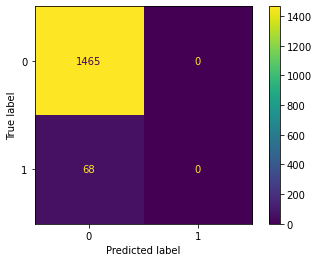


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(gbc_pipeline1, x_train, y_train, x_test,y_test)

# AdaBoost Classifier


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



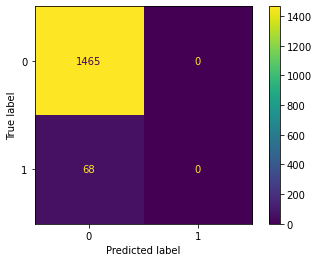


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(abc_pipeline, x_train, y_train, x_test,y_test)

#### GirdSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'n_estimators' : range(2,30), 'learning_rate' : np.linspace(0.1,2,19)
}

abc_pipeline1 = Pipeline([('Ada Boost Classifier', AdaBoostClassifier())])
clf = GridSearchCV(abc_pipeline1,param_grid = parameters,cv=10)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

In [ ]:
abc_pipeline2 = Pipeline([('Ada Boost Classifier', AdaBoostClassifier(n_estimators=23, base_estimator=svc, learning_rate=1.3666666666666667))])


Accuracy from the model for testing data is 95.56425309849968 %.

Confusion Matrix for the model is :



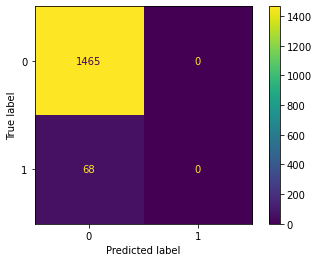


Classification report :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.00      0.00      0.00        68

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(abc_pipeline2, x_train, y_train, x_test,y_test)

# MLP

In [ ]:
import torch #import python #
import keras #
import tensorflow #import pytorch
import torch.nn as nn
from torch.autograd import Variable

import pandas as pd

from sklearn.utils import shuffle

In [ ]:
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

In [ ]:
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
#Define training hyperprameters.
batch_size = 32 #sample batch
num_epochs = 1000 #number times dataset seen
learning_rate = 0.01
size_hidden = 1024 #neurons
# size_hidden_2 = 100 #neurons
num_classes = 30

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix

In [ ]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden_1 = nn.Linear(num_inputs, size_hidden)
        self.hidden_2 = nn.Linear(num_inputs, size_hidden)
        self.hidden_actvn = nn.Tanh()

        self.out_layer = nn.Linear(size_hidden, n_output)
        self.out_actvn = nn.Identity()

    def forward(self, x):
        x1 = self.hidden_actvn(self.hidden_1(x))      # activation function for hidden layer
        x2= self.hidden_actvn(self.hidden_2(x))      # activation function for hidden layer
        x3 = torch.add(x2,x1)
        res = self.out_actvn(self.out_layer(x3))                    # output
        return res
        

net = Net(cols, size_hidden, num_classes)
# summary(net, (1, 4))

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, Y_train = shuffle(X_train, Y_train)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = torch.FloatTensor(X_train[start:end])
        labels = torch.LongTensor(Y_train[start:end])
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # print(labels)
        # loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
        # print(max(labels))
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
         
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0


Epoch: 1 | Loss: 0.3932 | Train Accuracy: 92.00
Epoch: 2 | Loss: 0.1690 | Train Accuracy: 94.68
Epoch: 3 | Loss: 0.1655 | Train Accuracy: 94.88
Epoch: 4 | Loss: 0.1736 | Train Accuracy: 94.74
Epoch: 5 | Loss: 0.1631 | Train Accuracy: 94.99
Epoch: 6 | Loss: 0.1636 | Train Accuracy: 95.05
Epoch: 7 | Loss: 0.1605 | Train Accuracy: 95.10
Epoch: 8 | Loss: 0.1615 | Train Accuracy: 94.93
Epoch: 9 | Loss: 0.1609 | Train Accuracy: 94.85
Epoch: 10 | Loss: 0.1568 | Train Accuracy: 95.10
Epoch: 11 | Loss: 0.1589 | Train Accuracy: 94.82
Epoch: 12 | Loss: 0.1592 | Train Accuracy: 95.16
Epoch: 13 | Loss: 0.1562 | Train Accuracy: 95.44
Epoch: 14 | Loss: 0.1549 | Train Accuracy: 95.21
Epoch: 15 | Loss: 0.1547 | Train Accuracy: 95.10
Epoch: 16 | Loss: 0.1511 | Train Accuracy: 94.93
Epoch: 17 | Loss: 0.1506 | Train Accuracy: 95.50
Epoch: 18 | Loss: 0.1517 | Train Accuracy: 95.16
Epoch: 19 | Loss: 0.1568 | Train Accuracy: 95.07
Epoch: 20 | Loss: 0.1579 | Train Accuracy: 94.90
Epoch: 21 | Loss: 0.1512 | Tr

# Xgboost


Accuracy from the model for testing data is 94.58577951728635 %.

Confusion Matrix for the model is :



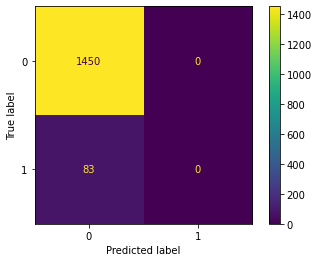


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533


ROC and AUC :



In [ ]:
access_pipeline(xgb_pipeline, x_train, y_train, x_test,y_test)

#### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'max_depth': [5, 7, 9],
           'n_estimators': [300, 500, 900],
           'learn_rate': [0.15, 0.45, 0.75]}
xgbc = XGBClassifier()


clf = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,   
                   cv=5)
clf.fit(X_train, y_train)
# clf_train_pred = clf.predict(x_test)
#print("accuracy score train", accuracy_score(Y_test, clf_pred))
print("Best parameters:", clf.best_params_)
print("RMSE train: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learn_rate': 0.15, 'max_depth': 5, 'n_estimators': 300}
RMSE train:  0.2230732857675776


In [ ]:
xgb_pipeline1 = Pipeline([('XGBoost Classifier', XGBClassifier(n_estimators= 300, max_depth= 5, learning_rate= 0.15))]) # best params


Accuracy from the model for testing data is 94.3900848010437 %.

Confusion Matrix for the model is :



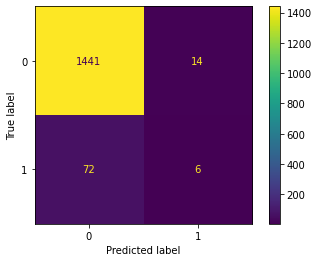


Classification report :

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1455
           1       0.30      0.08      0.12        78

    accuracy                           0.94      1533
   macro avg       0.63      0.53      0.55      1533
weighted avg       0.92      0.94      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(xgb_pipeline1, x_train, y_train, x_test,y_test)

# Boosting -> Bagging

In [ ]:
xgbr =  XGBClassifier(n_estimators= 300, max_depth= 5, learning_rate= 0.15)


Accuracy from the model for testing data is 94.65101108936726 %.

Confusion Matrix for the model is :



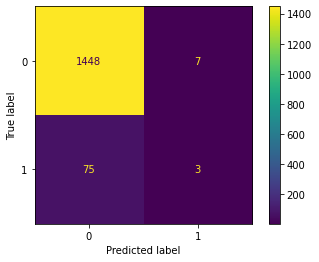


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1455
           1       0.30      0.04      0.07        78

    accuracy                           0.95      1533
   macro avg       0.63      0.52      0.52      1533
weighted avg       0.92      0.95      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(booba_pipeline, x_train, y_train, x_test,y_test)

# Support Vector Classification


Accuracy from the model for testing data is 95.10763209393346 %.

Confusion Matrix for the model is :



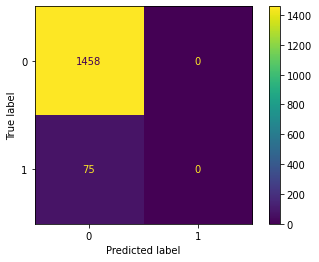


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(svc_pipeline, x_train, y_train, x_test,y_test)

#### GridSearch CV

In [ ]:
params={
    'C': [1, 3, 5, 7, 9],
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree': [2, 3, 4, 5, 6],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

sv = SVC()


clf = GridSearchCV(estimator= sv, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,   
                   cv=5)
clf.fit(X_train, y_train)
# clf_train_pred = clf.predict(x_test)
#print("accuracy score train", accuracy_score(Y_test, clf_pred))
print("Best parameters:", clf.best_params_)
print("RMSE train: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale'}
RMSE train:  0.22055380685131556



Accuracy from the model for testing data is 95.10763209393346 %.

Confusion Matrix for the model is :



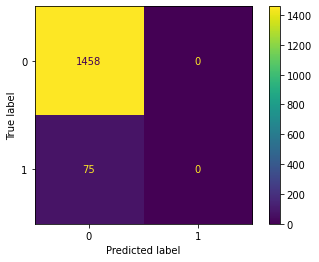


Classification report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


ROC and AUC :



In [ ]:
access_pipeline(svc_pipeline1, x_train, y_train, x_test,y_test)